In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
from NEF_syn import *
from NEF_rec import *

palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

# Debug

training sid 1, trial 1
training sid 1, trial 2
training sid 1, trial 3
training sid 1, trial 4
training sid 1, trial 5
training sid 1, trial 6
training sid 1, trial 7
training sid 1, trial 8
training sid 1, trial 9
training sid 1, trial 10
training sid 1, trial 11
training sid 1, trial 12
training sid 1, trial 13
training sid 1, trial 14
training sid 1, trial 15
training sid 1, trial 16
training sid 1, trial 17
training sid 1, trial 18
training sid 1, trial 19
training sid 1, trial 20
training sid 1, trial 21
training sid 1, trial 22
training sid 1, trial 23
training sid 1, trial 24
training sid 1, trial 25
training sid 1, trial 26
training sid 1, trial 27
training sid 1, trial 28
training sid 1, trial 29
training sid 1, trial 30
training sid 1, trial 31
training sid 1, trial 32
training sid 1, trial 33
training sid 1, trial 34
training sid 1, trial 35
training sid 1, trial 36
training sid 1, trial 37
training sid 1, trial 38
training sid 1, trial 39
training sid 1, trial 40


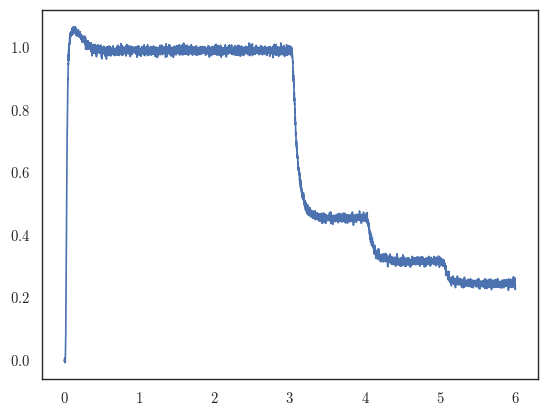

In [3]:
dataset='jiang'
sid=1
empirical = pd.read_pickle(f"data/{dataset}.pkl").query("sid==@sid")
trials = empirical['trial'].unique() 
alpha=0.2
z=0
lambd=0
n_neurons=500
W = np.zeros((1, n_neurons))
for trial in trials[:50]:
    print(f"training sid {sid}, trial {trial}")
    env = EnvironmentSyn(dataset, sid=sid, trial=trial)
    W = simulate_NEF_syn(W, env, alpha=alpha, n_neurons=n_neurons, lambd=lambd, seed_net=sid, train=True)
env = EnvironmentSyn(dataset, sid=sid, trial=trial)
net, sim = simulate_NEF_syn(W, env, alpha=alpha, n_neurons=n_neurons, lambd=lambd, seed_net=sid, train=False)
fig, ax = plt.subplots()
ax.plot(sim.trange(), sim.data[net.probe_weight])
plt.show()

# Decode value estimate during intertrial interval

In [16]:
syn = run_NEF_syn("carrabin", sid=1, alpha=6e-5, z=0, lambd=0, n_neurons=500, pretrain=True)

training sid 1, trial 1
training sid 1, trial 2
training sid 1, trial 3
training sid 1, trial 4
training sid 1, trial 5
training sid 1, trial 6
training sid 1, trial 7
training sid 1, trial 8
training sid 1, trial 9
training sid 1, trial 10
training sid 1, trial 11
training sid 1, trial 12
training sid 1, trial 13
training sid 1, trial 14
training sid 1, trial 15
training sid 1, trial 16
training sid 1, trial 17
training sid 1, trial 18
training sid 1, trial 19
training sid 1, trial 20
training sid 1, trial 21
training sid 1, trial 22
training sid 1, trial 23
training sid 1, trial 24
training sid 1, trial 25
training sid 1, trial 26
training sid 1, trial 27
training sid 1, trial 28
training sid 1, trial 29
training sid 1, trial 30
training sid 1, trial 31
training sid 1, trial 32
training sid 1, trial 33
training sid 1, trial 34
training sid 1, trial 35
training sid 1, trial 36
training sid 1, trial 37
training sid 1, trial 38
training sid 1, trial 39
training sid 1, trial 40
training 

In [18]:
syn.to_pickle("data/NEF_syn_compare_ITI.pkl")

In [2]:
rec = run_NEF_rec("carrabin", sid=1, alpha=0.2, z=0, lambd=0, n_neurons=500, pretrain=True)

training sid 1, trial 1
training sid 1, trial 2
training sid 1, trial 3
training sid 1, trial 4
training sid 1, trial 5
training sid 1, trial 6
training sid 1, trial 7
training sid 1, trial 8
training sid 1, trial 9
training sid 1, trial 10
training sid 1, trial 11
training sid 1, trial 12
training sid 1, trial 13
training sid 1, trial 14
training sid 1, trial 15
training sid 1, trial 16
training sid 1, trial 17
training sid 1, trial 18
training sid 1, trial 19
training sid 1, trial 20
training sid 1, trial 21
training sid 1, trial 22
training sid 1, trial 23
training sid 1, trial 24
training sid 1, trial 25
training sid 1, trial 26
training sid 1, trial 27
training sid 1, trial 28
training sid 1, trial 29
training sid 1, trial 30
training sid 1, trial 31
training sid 1, trial 32
training sid 1, trial 33
training sid 1, trial 34
training sid 1, trial 35
training sid 1, trial 36
training sid 1, trial 37
training sid 1, trial 38
training sid 1, trial 39
training sid 1, trial 40
training 

In [3]:
rec.to_pickle("data/NEF_rec_compare_ITI.pkl")

## Compare with human responses (QID mean loss)

In [19]:
sid = 1
syn = pd.read_pickle("data/NEF_syn_compare_ITI.pkl")
rec = pd.read_pickle("data/NEF_rec_compare_ITI.pkl")
human = pd.read_pickle("data/carrabin.pkl").query("sid==@sid")
trials = human['trial'].unique()
stages = human['stage'].unique()
dfs = []
columns = ['type', 'qid', 'response']
for model_type in ['NEF_syn', 'NEF_rec']:
    nef = syn if model_type=='NEF_syn' else rec
    for trial in trials:
        for stage in stages:
            qid = human.query("trial==@trial and stage==@stage")['qid'].unique()[0]
            response_human = human.query("trial==@trial and stage==@stage")['response'].unique()[0]
            dfs.append(pd.DataFrame([["human", qid, response_human]], columns=columns))
            response_model = nef.query("trial==@trial & stage==@stage")['estimate'].unique()[0]
            dfs.append(pd.DataFrame([[model_type, qid, response_model]], columns=columns))
response_data = pd.concat(dfs, ignore_index=True)
columns = ['type', 'qid', 'mean error']
dfs = []
for model_type in ['NEF_syn', 'NEF_rec']:
    for qid in response_data['qid'].unique():
        n_total = response_data.query("type=='human'")['qid'].size
        n_qid = response_data.query("type=='human' & qid==@qid")['qid'].size
        W = n_qid / n_total
        responses_model = response_data.query("qid==@qid & type==@model_type")['response'].to_numpy()
        responses_human = response_data.query("qid==@qid & type=='human'")['response'].to_numpy()
        error = W * np.abs(np.mean(responses_model) - np.mean(responses_human))
        dfs.append(pd.DataFrame([[model_type, qid, error]], columns=columns))
error_data = pd.concat(dfs, ignore_index=True)

In [20]:
error_data

,type,qid,mean error
0,NEF_syn,1,0.006357
1,NEF_syn,10,0.000710
2,NEF_syn,100,0.001391
3,NEF_syn,1000,0.000930
4,NEF_syn,10000,0.002106
...,...,...,...
119,NEF_rec,0110,0.000528
120,NEF_rec,01101,0.000158
121,NEF_rec,01100,0.000238
122,NEF_rec,11001,0.000061


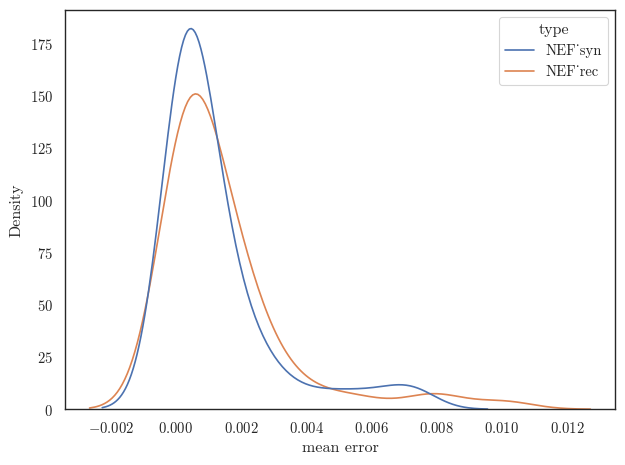

In [21]:
fig, ax = plt.subplots()
sns.kdeplot(error_data, x='mean error', hue='type', ax=ax)
plt.tight_layout()
plt.show()